In [26]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [15]:
# Sample data for four days
data = np.array([
    [1, 3, 0.5, 2.5], # Day 1: [open, high, low, close]
    [2.5, 4, 2, 3.5],
    [3.5, 5, 3, 4.5],
    [4.5, 6, 4, 5.5],
    [5.5, 6.5, 5, 6],
    [6, 7, 5.5, 6.5],
    [6.5, 8, 6, 7],
    [7, 8.5, 6.5, 7.5],
    [7.5, 9, 7, 8],
    [8, 9.5, 7.5, 8.5] # Day 10: [open, high, low, close]
])
data

array([[1. , 3. , 0.5, 2.5],
       [2.5, 4. , 2. , 3.5],
       [3.5, 5. , 3. , 4.5],
       [4.5, 6. , 4. , 5.5],
       [5.5, 6.5, 5. , 6. ],
       [6. , 7. , 5.5, 6.5],
       [6.5, 8. , 6. , 7. ],
       [7. , 8.5, 6.5, 7.5],
       [7.5, 9. , 7. , 8. ],
       [8. , 9.5, 7.5, 8.5]])

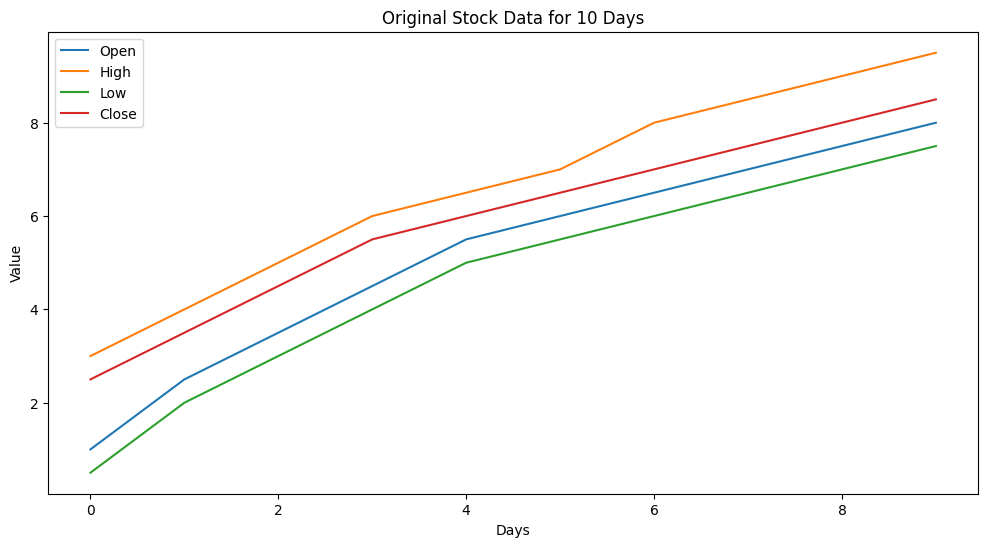

In [27]:
# Plotting the original 4 features
features = ['Open', 'High', 'Low', 'Close']
plt.figure(figsize=(12,6))
for idx, feature in enumerate(features):
    plt.plot(data[:, idx], label=feature)
plt.title('Original Stock Data for 10 Days')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Value')
plt.show()

In [16]:
# Normalizing the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized

array([[0.        , 0.        , 0.        , 0.        ],
       [0.21428571, 0.15384615, 0.21428571, 0.16666667],
       [0.35714286, 0.30769231, 0.35714286, 0.33333333],
       [0.5       , 0.46153846, 0.5       , 0.5       ],
       [0.64285714, 0.53846154, 0.64285714, 0.58333333],
       [0.71428571, 0.61538462, 0.71428571, 0.66666667],
       [0.78571429, 0.76923077, 0.78571429, 0.75      ],
       [0.85714286, 0.84615385, 0.85714286, 0.83333333],
       [0.92857143, 0.92307692, 0.92857143, 0.91666667],
       [1.        , 1.        , 1.        , 1.        ]])

In [17]:
# Creating sequences of 2 days
X = []
y = []

for i in range(len(data_normalized) - 2):
    X.append(data_normalized[i:i+2])
    y.append(data_normalized[i+2])

X = np.array(X)
y = np.array(y)
print("Start x")
print(X)
print("Start y")
print(y)

Start x
[[[0.         0.         0.         0.        ]
  [0.21428571 0.15384615 0.21428571 0.16666667]]

 [[0.21428571 0.15384615 0.21428571 0.16666667]
  [0.35714286 0.30769231 0.35714286 0.33333333]]

 [[0.35714286 0.30769231 0.35714286 0.33333333]
  [0.5        0.46153846 0.5        0.5       ]]

 [[0.5        0.46153846 0.5        0.5       ]
  [0.64285714 0.53846154 0.64285714 0.58333333]]

 [[0.64285714 0.53846154 0.64285714 0.58333333]
  [0.71428571 0.61538462 0.71428571 0.66666667]]

 [[0.71428571 0.61538462 0.71428571 0.66666667]
  [0.78571429 0.76923077 0.78571429 0.75      ]]

 [[0.78571429 0.76923077 0.78571429 0.75      ]
  [0.85714286 0.84615385 0.85714286 0.83333333]]

 [[0.85714286 0.84615385 0.85714286 0.83333333]
  [0.92857143 0.92307692 0.92857143 0.91666667]]]
Start y
[[0.35714286 0.30769231 0.35714286 0.33333333]
 [0.5        0.46153846 0.5        0.5       ]
 [0.64285714 0.53846154 0.64285714 0.58333333]
 [0.71428571 0.61538462 0.71428571 0.66666667]
 [0.78571429

In [18]:
# Splitting the data into training and testing (75% training, 25% testing)
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("X_train")
print(X_train)
print("X_test")
print(X_test)
print("y_train")
print(y_train)
print("y_test")
print(y_test)


X_train
[[[0.         0.         0.         0.        ]
  [0.21428571 0.15384615 0.21428571 0.16666667]]

 [[0.21428571 0.15384615 0.21428571 0.16666667]
  [0.35714286 0.30769231 0.35714286 0.33333333]]

 [[0.35714286 0.30769231 0.35714286 0.33333333]
  [0.5        0.46153846 0.5        0.5       ]]

 [[0.5        0.46153846 0.5        0.5       ]
  [0.64285714 0.53846154 0.64285714 0.58333333]]

 [[0.64285714 0.53846154 0.64285714 0.58333333]
  [0.71428571 0.61538462 0.71428571 0.66666667]]]
X_test
[[[0.71428571 0.61538462 0.71428571 0.66666667]
  [0.78571429 0.76923077 0.78571429 0.75      ]]

 [[0.78571429 0.76923077 0.78571429 0.75      ]
  [0.85714286 0.84615385 0.85714286 0.83333333]]

 [[0.85714286 0.84615385 0.85714286 0.83333333]
  [0.92857143 0.92307692 0.92857143 0.91666667]]]
y_train
[[0.35714286 0.30769231 0.35714286 0.33333333]
 [0.5        0.46153846 0.5        0.5       ]
 [0.64285714 0.53846154 0.64285714 0.58333333]
 [0.71428571 0.61538462 0.71428571 0.66666667]
 [0.7

In [56]:
# Custom loss functions
import keras.backend as K
import tensorflow as tf
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def mae(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)


def mape(y_true, y_pred):
    return 100. * K.mean(K.abs((y_pred - y_true) / K.clip(K.abs(y_true), K.epsilon(), None)), axis=-1)

def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = K.abs(error) <= delta
    squared_loss = 0.5 * K.square(error)
    linear_loss = delta * (K.abs(error) - 0.5 * delta)
    return K.mean(tf.where(is_small_error, squared_loss, linear_loss))

def max_drawdown(y_true, y_pred):
    # Cumulative returns
    cum_ret_true = K.cumprod(1 + y_true) 
    cum_ret_pred = K.cumprod(1 + y_pred)
    
    # Calculate running maximum BUGGG
    running_max_true = K.maximum(cum_ret_true, K.cummax(cum_ret_true))
    running_max_pred = K.maximum(cum_ret_pred, K.cummax(cum_ret_pred))
    
    # Calculate drawdown
    drawdown_true = cum_ret_true / running_max_true - 1
    drawdown_pred = cum_ret_pred / running_max_pred - 1
    
    # Return the difference between the two drawdowns
    return K.mean(K.square(drawdown_pred - drawdown_true))

loss_functions = [rmse, mae, mape, huber_loss]
loss_names = ["RMSE", "MAE", "MAPE", "Huber Loss"]

best_loss_value = float('inf')  # Initialize with a high value
best_loss_function = None

evaluation_results = {}  # Store evaluation results for each loss function


In [57]:
for loss_func, loss_name in zip(loss_functions, loss_names):
    # Define the model
    model = Sequential()
    model.add(LSTM(50, input_shape=(2, 4)))
    model.add(Dense(4))
    model.compile(optimizer='adam', loss=loss_func)
    
    # Train the model
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0)
    
    # Evaluate the model on the validation set
    # You might want to split your data into a validation set beforehand.
    val_loss = model.evaluate(X_train, y_train, verbose=0)
    
    # Store the evaluation result
    evaluation_results[loss_name] = val_loss
    
    # Check if this loss function is the best so far
    if val_loss < best_loss_value:
        best_loss_value = val_loss
        best_loss_function = loss_name

print("Evaluation Results:")
for loss_name, val_loss in evaluation_results.items():
    print(f"{loss_name}: {val_loss}")

print(f"The best loss function is: {best_loss_function} with value: {best_loss_value}")

2023-09-18 17:23:37.818215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 17:23:38.018130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 17:23:38.203120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-09-18 17:23:49.643889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 17:23:49.714416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 17:23:50.536736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 17:23:50.691789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 17:23:50.790674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 17:24:00.605778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 17:24:00.676645: I tensorflow/core/grappler/optimizers/cust

Evaluation Results:
RMSE: 0.01729986071586609
MAE: 0.011881361715495586
MAPE: 2.0195815563201904
Huber Loss: 0.00017106519953813404
The best loss function is: Huber Loss with value: 0.00017106519953813404


2023-09-18 17:24:26.361732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 17:24:26.434677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [51]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(2, 4)))
model.add(Dense(4))
model.compile(optimizer='adam', loss=custom_mse)
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                11000     
                                                                 
 dense_4 (Dense)             (None, 4)                 204       
                                                                 
Total params: 11204 (43.77 KB)
Trainable params: 11204 (43.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [52]:
# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=1)
print("End model")
print(model)


Epoch 1/200


2023-09-18 17:07:49.703456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 17:07:49.875775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/5 [=====>........................] - ETA: 4s - loss: 0.3839

2023-09-18 17:07:50.038877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 29ms/step - loss: 0.3553
Epoch 2/200
5/5 [==============================] - 0s 12ms/step - loss: 0.3051
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 0.2635
Epoch 4/200
5/5 [==============================] - 0s 11ms/step - loss: 0.2243
Epoch 5/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1789
Epoch 6/200
5/5 [==============================] - 0s 27ms/step - loss: 0.1470
Epoch 7/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1082
Epoch 8/200
5/5 [==============================] - 0s 17ms/step - loss: 0.0744
Epoch 9/200
5/5 [==============================] - 0s 13ms/step - loss: 0.0476
Epoch 10/200
5/5 [==============================] - 0s 13ms/step - loss: 0.0265
Epoch 11/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0123
Epoch 12/200
5/5 [==============================] - 0s 14ms/step - loss: 0.0056
Epoch 13/200
5/5 [==============================] - 0s 13ms/s

In [21]:
# Predicting using the model
predictions = model.predict(X_test)
print("End predictions")
print(predictions)
print("End y_test")
print(y_test)


2023-09-18 13:44:49.436319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 13:44:49.502651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 817ms/step
End predictions
[[0.8462815  0.792175   0.8496848  0.7993125 ]
 [0.900117   0.8553326  0.90765953 0.8518184 ]
 [0.9492892  0.9130405  0.9603967  0.9008516 ]]
End y_test
[[0.85714286 0.84615385 0.85714286 0.83333333]
 [0.92857143 0.92307692 0.92857143 0.91666667]
 [1.         1.         1.         1.        ]]


In [23]:
# Inverse transforming the predictions to original scale
predictions_original_scale = scaler.inverse_transform(predictions)

print("End predictions_original_scale")
print("Predictions for Day 8,9,10")
print(predictions_original_scale)


# Here, you can further calculate the model's accuracy, visualize predictions vs. actuals, etc.


End predictions_original_scale
Predictions for Day 8,9,10
[[6.9239707 8.1491375 6.4477935 7.2958746]
 [7.300819  8.559662  6.8536167 7.6109104]
 [7.645025  8.934763  7.2227774 7.9051094]]


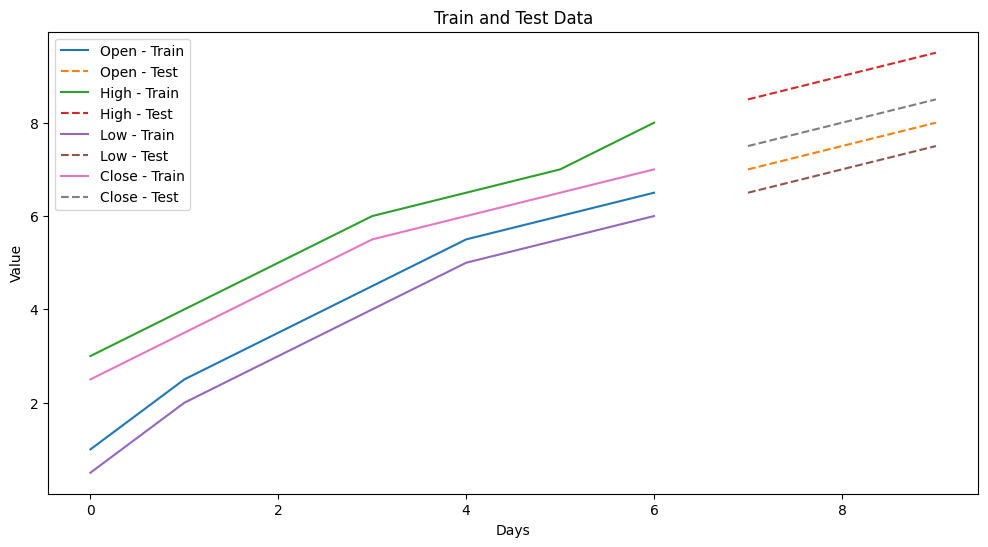

In [37]:
# Plotting train and test data
plt.figure(figsize=(12,6))
for idx, feature in enumerate(features):
    plt.plot(data[:train_size+2, idx], label=feature + ' - Train')
    plt.plot(np.arange(train_size+2, 10), data[train_size+2:, idx], label=feature + ' - Test', linestyle='dashed')
plt.title('Train and Test Data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Value')
plt.show()

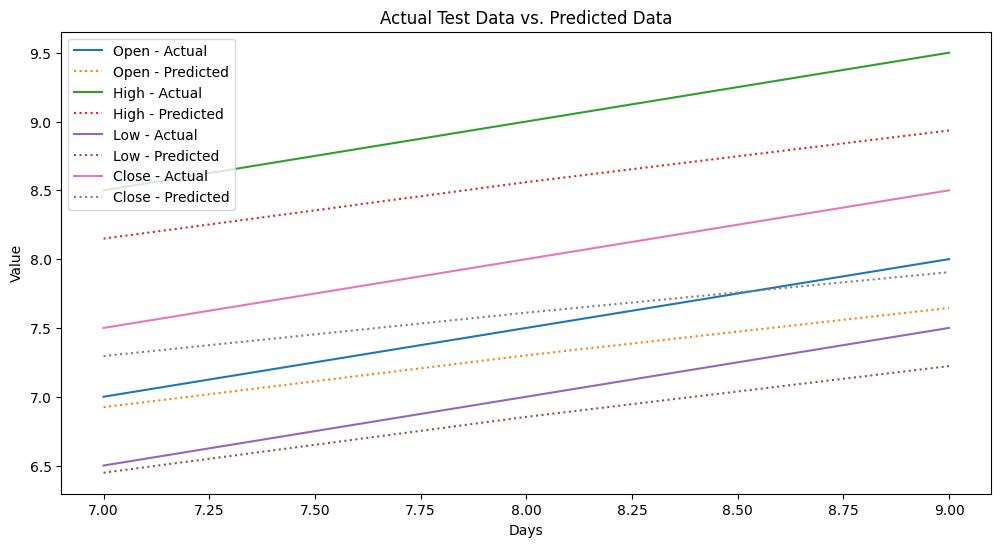

In [38]:
# Plotting the actual test data vs. predictions
plt.figure(figsize=(12,6))
test_days = np.arange(train_size+2, 10)
for idx, feature in enumerate(features):
    plt.plot(test_days, data[train_size+2:, idx], label=feature + ' - Actual', linestyle='solid')
    plt.plot(test_days, predictions_original_scale[-len(y_test):, idx], label=feature + ' - Predicted', linestyle='dotted')
plt.title('Actual Test Data vs. Predicted Data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Value')
plt.show()


In [25]:
last_two_days = data_normalized[-2:].reshape(1, 2, 4)  # reshape it to match the LSTM input shape
prediction_day_11 = model.predict(last_two_days)
prediction_day_11_original_scale = scaler.inverse_transform(prediction_day_11)
# Print the prediction for Day 11
print("Prediction for Day 11")
print(prediction_day_11_original_scale)

1/1 [==============================] - 0s 26ms/step
Prediction for Day 11
[[7.9762774 9.306133  7.58312   8.192527 ]]


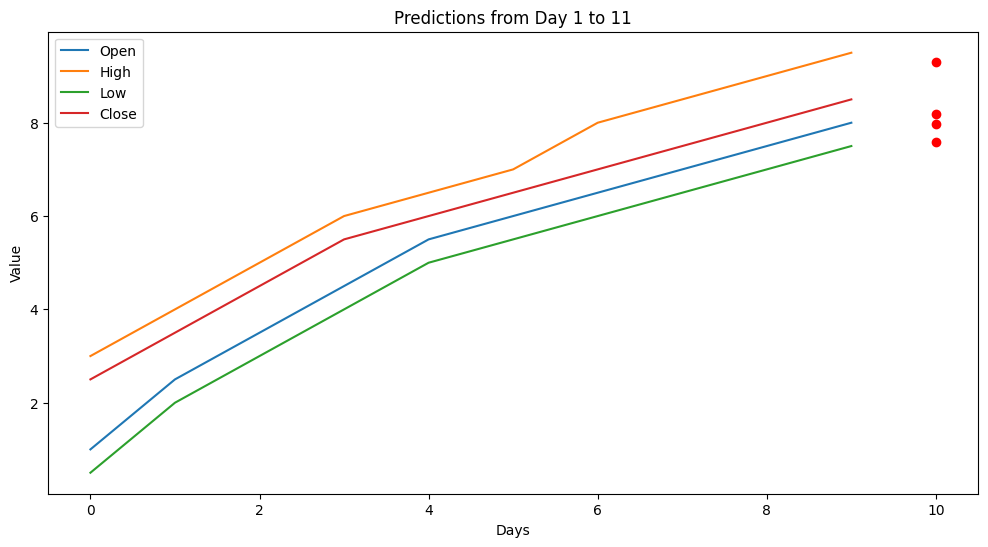

In [29]:
plt.figure(figsize=(12,6))
for idx, feature in enumerate(features):
    plt.plot(data[:, idx], label=feature)
    plt.plot(10, prediction_day_11_original_scale[0, idx], 'ro')  # 11th day prediction as red dot
plt.title('Predictions from Day 1 to 11')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Value')
plt.show()


In [30]:
# Evaluating the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")

2023-09-18 13:52:09.415583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-18 13:52:09.499278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 999ms/step - loss: 0.0030
Model loss on the test set: 0.0029848869889974594


In [43]:
dense_weights = model.layers[-1].get_weights()[0]
print("Dense weights")
print(dense_weights)
print("Dense weights shape")
print(dense_weights.shape)

Dense weights
[[ 0.24204771  0.34700868  0.10465317  0.13470103]
 [-0.22241187  0.24223879  0.33987874  0.11804949]
 [-0.27526146 -0.27674675 -0.23243827 -0.14985111]
 [-0.19475365 -0.34272513  0.19254936  0.3211398 ]
 [ 0.24512272  0.04652064  0.34171158  0.175765  ]
 [ 0.09562108 -0.27800426 -0.12414758 -0.25765398]
 [-0.1448652  -0.11407355 -0.14700602  0.03409471]
 [ 0.23249775  0.08086637  0.28009728  0.23246385]
 [ 0.08624865 -0.13691913 -0.32836983  0.07164814]
 [-0.15182836  0.18065709  0.0757309   0.09939429]
 [-0.30500212  0.14687422 -0.09290864 -0.18023886]
 [ 0.20082653  0.27374008  0.26154503 -0.06828056]
 [-0.24697012 -0.29660174 -0.32722458 -0.20031637]
 [ 0.14286076 -0.27845225  0.06564759 -0.30439866]
 [-0.06303713  0.01222553 -0.22627303 -0.22017962]
 [-0.17824784 -0.14121176 -0.28116053  0.27390224]
 [ 0.00147842  0.13022408 -0.10577806 -0.19141415]
 [-0.2869126  -0.10649531  0.03873062 -0.24465919]
 [-0.26213259 -0.23653974 -0.23652415 -0.0270167 ]
 [ 0.31705704  0.

In [46]:
feature_weights = np.abs(dense_weights).sum(axis=0)
print("Feature weights")
print(feature_weights)

Feature weights
[ 9.129775 10.067626  9.130236  9.096137]


In [47]:
weighted_importance = np.abs(prediction_day_11) * feature_weights
print("Weighted importance")
print(weighted_importance)

Weighted importance
[[9.098835 9.767352 9.238651 8.630001]]


In [48]:
final_importance_value = weighted_importance.sum()

print("Final single importance value:", final_importance_value)

Final single importance value: 36.73484
